In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from numpy.linalg import norm
import seaborn as sns
from math import e
import random

In [83]:
def Normalize(x):
    x = (x - x.min() ) / (x.max() - x.min())
    return x

In [84]:
def Addbias(X):
    matrix = X.reshape(X.shape[0], 7)
    ones = np.ones((matrix.shape[0],1))
    concat=np.concatenate((ones,matrix), axis=1)
    return concat 

In [85]:
def relabel(y_train):
    y_train1=[1 if y==1 else 0 for y in y_train ]
    y_train2=[1 if y==2 else 0 for y in y_train ]
    y_train3=[1 if y==3 else 0 for y in y_train ]
    y_train1 =np.array(y_train1)
    y_train2 =np.array(y_train2)
    y_train3 =np.array(y_train3)
    return y_train1,y_train2,y_train3
   
    

In [86]:
df=pd.read_excel("seed.xlsx")
#df["class"].replace({1: 0., 2: 1., 3: 2.}, inplace=True)
x_train,x_test,y_train,y_test= ms.train_test_split(df[["x1","x2",'x3','x4','x5','x6','x7']],df['class'], train_size=0.8)

In [87]:
x_train=Normalize(np.asanyarray(x_train))
x_test=Normalize(np.asanyarray(x_test))
y_train=np.asanyarray(y_train)
y_test=np.asanyarray(y_test)

In [88]:
def sigmoid(x,theta,theta0):
    temp=np.dot(x,theta )+theta0
    y = 1 / (1 + np.exp(-temp))
    return y

In [89]:
def cost(y_hat,y,m):
    d = -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))
    return d

In [90]:
def LogisticRegression(x, y,alpha,itr): 
    m, n = x.shape
    theta=np.random.rand(n)
    theta0=0.001
    errors= []
    for i in range(itr):  
        y_hat = sigmoid(x,theta,theta0)
        error= cost(y_hat,y,m)
        errors.append(error)
        theta= theta - alpha*(1/m * np.dot(x.T, (y_hat - y)))
        theta0=theta0 - alpha*(1/m * np.sum(y_hat - y))
    errors = np.array(errors)    
    return theta,theta0,errors

In [91]:
def predict(x_test,theta,theta0):
    y_hat_test =sigmoid(x_test,theta,theta0)
    return y_hat_test

In [92]:
y_train1,y_train2,y_train3=relabel(y_train)

In [93]:
#model1
theta_m1,theta0_m1,errors_m1 = LogisticRegression(x_train,y_train1, 0.07,200000)

In [94]:
#model2 
theta_m2,theta0_m2,errors_m2 = LogisticRegression(x_train,y_train2, 0.07,200000)

In [95]:
#model3
theta_m3,theta0_m3,errors_m3 = LogisticRegression(x_train,y_train3, 0.07,200000)

In [96]:
#predictlabel
y_hat1=predict(x_test,theta_m1,theta0_m1)
y_hat2=predict(x_test,theta_m2,theta0_m2)
y_hat3=predict(x_test,theta_m3,theta0_m3)
label=[]
for i in range(y_hat1.shape[0]):
    max_pro=max(y_hat1[i],y_hat2[i],y_hat3[i])
    if y_hat1[i]==max_pro and y_hat2[i]==max_pro  :
        label.append(random.randint(1,2))
        continue
    if y_hat2[i]==max_pro and y_hat3[i]==max_pro :
        label.append(random.randint(2,3))
        continue
        
    if y_hat1[i]==max_pro and y_hat3[i]==max_pro :
        label_t=random.randint(1,3)
        while(label_t== 2):
            label_t=random.randint(1,3)
        label.append(label_t)
        continue
    if y_hat1[i]==max_pro and y_hat3[i]==max_pro and y_hat2[i]==max_pro : 
        label.append(random.randint(1,3))
        continue
    if y_hat1[i]==max_pro :
        label.append(1)
    if y_hat2[i]==max_pro :
        label.append(2)
    if y_hat3[i]==max_pro :
        label.append(3)
        
label=np.array(label)
accuracy_test = np.sum(y_test == label) / (y_test.shape[0])
print('Test accuracy:', accuracy_test)

Test accuracy: 0.9761904761904762


In [97]:
y_hat1=predict(x_train,theta_m1,theta0_m1)
y_hat2=predict(x_train,theta_m2,theta0_m2)
y_hat3=predict(x_train,theta_m3,theta0_m3)
label=[]
for i in range(y_hat1.shape[0]):
    max_pro=max(y_hat1[i],y_hat2[i],y_hat3[i])
    if y_hat1[i]==max_pro and y_hat2[i]==max_pro  :
        label.append(random.randint(1,2))
        continue
    if y_hat2[i]==max_pro and y_hat3[i]==max_pro :
        label.append(random.randint(2,3))
        continue
        
    if y_hat1[i]==max_pro and y_hat3[i]==max_pro :
        label_t=random.randint(1,3)
        while(label_t== 2):
            label_t=random.randint(1,3)
        label.append(label_t)
        continue
    if y_hat1[i]==max_pro and y_hat3[i]==max_pro and y_hat2[i]==max_pro : 
        label.append(random.randint(1,3))
        continue
    if y_hat1[i]==max_pro :
        label.append(1)
    if y_hat2[i]==max_pro :
        label.append(2)
    if y_hat3[i]==max_pro :
        label.append(3)
        
label=np.array(label)
accuracy_test = np.sum(y_train == label) / (y_train.shape[0])
print('Train accuracy:', accuracy_test)

Train accuracy: 0.8869047619047619


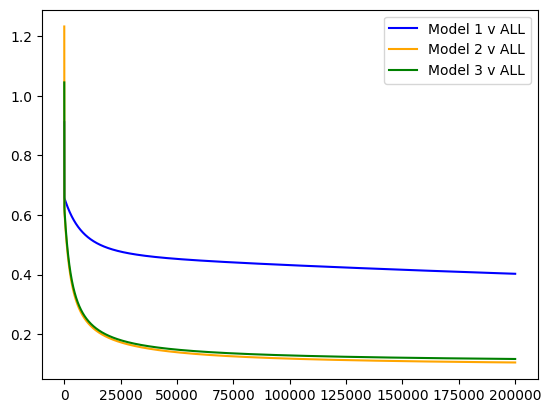

In [98]:
plt.plot(errors_m1, color='Blue', label='Model 1 v ALL')
plt.plot(errors_m2, color='Orange', label='Model 2 v ALL')
plt.plot(errors_m3, color='Green', label='Model 3 v ALL')
plt.legend(loc='best')
plt.show()

In [109]:
mean_error=[]
for i in range(len(errors_m1)):
    a,b,c=errors_m1[i],errors_m2[i],errors_m3[i]
    cost=a+b+c
    cost=cost/3
    mean_error.append(cost)
mean_error=np.array(mean_error)    
    

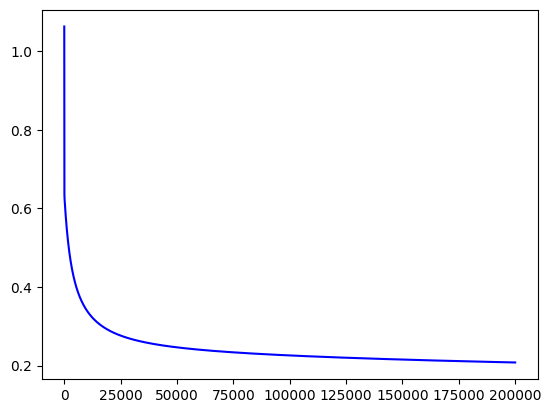

In [110]:
plt.plot(mean_error, color='Blue', label='mean')